Estudiante:Santiago Tene

Desarrollo

Ingrese a a página http://archive.ics.uci.edu/
Descargue el dataset Heart Disease.
Lea y entienda de que se trata el data set
Utilizando las etapas de un framework para DM, realice las acciones necesarias para cumplir con cada una de ellas. Sino es posible cumplir con alguna etapa explique el porqué.
Comente el porque realiza cada acción en el dataset (Ej. si utiliza la media explicar porque utiliza la media de un conjunto de variables)
Dentro de la etapa correspondiente realice las tareas necesarias para obtener un data set de 920 registros
Luego dentro de la etapa correspondiente realice un EDA.
Realice la imputación de datos perdidos utilizando para ellos la imputación con KNN
Dentro de las etapas de ciclo de vida de los datos realice un balanceo de las clases en la etapa que corresponda eligiendo cualquier método (RandomOverSampler,SMOTE,SMOTEN, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE,etc)
Guarde el nuevo conjunto de datos y exportelo a un archivo .csv
Responda la siguientes pregunta de control ¿Cree que el nuevo dataset creado es un data set confiable para aplicar una mineria de datos y explique el porqué?
Exporte el archivo .ipynb a pdf
Suba por separado los archivos .ipynb, pdf y csv al eva con su apellido y nombre (no suba archivos comprimidos no seran calificados).

Para

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

En el siguiente codigo intento sacar los nombres de las variables, para poder ponerlas en las columnas de las 4 base de datos Cleverland, Long Beach, etc

In [38]:
heart_disease.variables.name

0          age
1          sex
2           cp
3     trestbps
4         chol
5          fbs
6      restecg
7      thalach
8        exang
9      oldpeak
10       slope
11          ca
12        thal
13         num
Name: name, dtype: object

In [42]:
names = [heart_disease.variables.name]
names

[0          age
 1          sex
 2           cp
 3     trestbps
 4         chol
 5          fbs
 6      restecg
 7      thalach
 8        exang
 9      oldpeak
 10       slope
 11          ca
 12        thal
 13         num
 Name: name, dtype: object]

unir dataset, imputar y balancear

In [ ]:
En el siguiente codigo intento combinar los datos de todos los archivos, pero no me da el resultado buscado

In [33]:
with open('processed.cleveland.data', 'r') as file1:
    data1 = file1.readlines()

with open('reprocessed.hungarian.data', 'r') as file2:
    data2 = file2.readlines()

with open('processed.switzerland.data', 'r') as file3:
    data3 = file3.readlines()   
    data3
    
with open('long-beach-va.data', 'r') as file4:
    data4 = file4.readlines()
    
# Combina los datos de ambos archivos
combined_data = data1 + data2 + data3 + data4

# Guarda los datos combinados en un nuevo archivo
with open('tenesantiago.csv', 'w') as combined_file:
    combined_file.writelines(combined_data)


En los siguiente intentos quiero aplicar pandas y read para leer cada uno, al final realizar una concatenacion pero no surge efecto ya que los nombres de las columnas no las puedo ingresar

In [47]:
df1 = pd.read_csv('reprocessed.hungarian.data', encoding='latin-1', sep=',')
df1

,40 1 2 140 289 0 0 172 0 0 -9 -9 -9 0
0,49 0 3 160 180 0 0 156 0 1 2 -9 -9 1
1,37 1 2 130 283 0 1 98 0 0 -9 -9 -9 0
2,48 0 4 138 214 0 0 108 1 1.5 2 -9 -9 3
3,54 1 3 150 -9 0 0 122 0 0 -9 -9 -9 0
4,39 1 3 120 339 0 0 170 0 0 -9 -9 -9 0
...,...
288,48 0 2 -9 308 0 1 -9 -9 2 1 -9 -9 0
289,36 1 2 120 166 0 0 180 0 0 -9 -9 -9 0
290,48 1 3 110 211 0 0 138 0 0 -9 -9 6 0
291,47 0 2 140 257 0 0 135 0 1 1 -9 -9 0


In [48]:
df2 = pd.read_csv('processed.switzerland.data', encoding='latin-1', sep=',')
df2

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,70,1,4,115,0,0,1,92,1,0,2,?,7,1
118,70,1,4,140,0,1,0,157,1,2,2,?,7,3
119,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
120,73,0,3,160,0,0,1,121,0,0,1,?,3,1


In [49]:
df3 = pd.read_csv('processed.cleveland.data', encoding='latin-1', sep=',')
df3


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [62]:
df4 = pd.read_csv('long-beach-va.data', encoding='utf-8', sep=',')
df4

,1 0 63 1 1 1 1
0,-9 4 140 0 260 0 0 0
1,0 -9 0 1 1 22 85 0
2,0 1 0 0 5 4.5 -9 5
3,112 62 160 90 140 80 1 0
4,3 2 20 19 -9 -9 0 -9
...,...
1994,0 -9 21 17 -9 -9 -9 -9
1995,-9 -9 -9 -9 -9 -9 -9 6
1996,20 83 1 1 1 1 1 1
1997,1 1 1 2 1 1 1 1


In [ ]:
Codigo para concatenar las diferentes base de datos

In [63]:
df = pd.concat([df1, df2, df3, df4])
df

,40 1 2 140 289 0 0 172 0 0 -9 -9 -9 0,32,1,1.1,95,0,?,0.1,127,0.2,...,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,1 0 63 1 1 1 1
0,49 0 3 160 180 0 0 156 0 1 2 -9 -9 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37 1 2 130 283 0 1 98 0 0 -9 -9 -9 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48 0 4 138 214 0 0 108 1 1.5 2 -9 -9 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54 1 3 150 -9 0 0 122 0 0 -9 -9 -9 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39 1 3 120 339 0 0 170 0 0 -9 -9 -9 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 -9 21 17 -9 -9 -9 -9
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9 -9 -9 -9 -9 -9 -9 6
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 83 1 1 1 1 1 1
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 1 1 2 1 1 1 1


In [52]:
df.isnull().sum()

40 1 2 140 289 0 0 172 0 0 -9 -9 -9 0    2423
32                                       2594
1                                        2594
1.1                                      2594
95                                       2594
0                                        2292
?                                        2594
0.1                                      2594
127                                      2594
0.2                                      2594
.7                                       2594
1.2                                      2594
?.1                                      2594
?.2                                      2594
1.3                                      2594
63.0                                     2414
1.0                                      2414
1.0.1                                    2414
145.0                                    2414
233.0                                    2414
1.0.2                                    2414
2.0                               

Con gpt intento nuevamente concatenar pero esta vez doy nombre a todas las columnas manualmente, despues de intentar colocar el nombre desde los datos 'variables' de la base de datos colocada directamente de las pagina con python

In [95]:
import pandas as pd

datos1 = pd.read_csv('processed.cleveland.data', encoding='utf-8', header=None)
datos2 = pd.read_csv('processed.switzerland.data', encoding='utf-8', header=None)
datos3 = pd.read_csv('reprocessed.hungarian.data', encoding = 'utf-8',sep=' ', header=None)
datos4 = pd.read_csv('processed.va.data', encoding = 'utf-8', header=None, sep=',')

print(datos4.head())


# Asignar nombres a las columnas
columnas = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

datos1.columns = columnas
datos2.columns = columnas
datos3.columns = columnas
datos4.columns = columnas

# Realizar la fusión de los DataFrames
result = pd.concat([datos1, datos2, datos3, datos4], axis=0, ignore_index=True)

# Puedes ajustar los parámetros según la estructura específica de tus datos

# Mostrar el resultado
print(result)


   0   1   2    3    4  5   6    7  8    9  10 11 12  13
0  63   1   4  140  260  0   1  112  1    3  2  ?  ?   2
1  44   1   4  130  209  0   1  127  0    0  ?  ?  ?   0
2  60   1   4  132  218  0   1  140  1  1.5  3  ?  ?   2
3  55   1   4  142  228  0   1  149  1  2.5  1  ?  ?   1
4  66   1   3  110  213  1   2   99  1  1.3  2  ?  ?   0
      age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0    63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
1    67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
2    67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
3    37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
4    41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   
..    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
916  54.0  0.0  4.0      127    333    1       1     154     0       0     ?   
917  62.0  1.0  1.

In [71]:
result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1.0
917,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0.0
918,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2.0
919,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0.0


In [73]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [75]:
result.isnull().sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
num         1
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

In [ ]:
Aplico el imputer con KNN utilizando 5 vecinos, 

In [82]:
from sklearn.impute import KNNImputer
import numpy as np

# Replace non-numeric values with NaN
result.replace('?', np.nan, inplace=True)

# Convert columns to numeric (if they are not already)
result = result.apply(pd.to_numeric, errors='coerce')

# Initialize KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Perform imputation on the entire DataFrame
result_imputed = pd.DataFrame(imputer.fit_transform(result), columns=result.columns)

# Display the imputed DataFrame
print(result_imputed)


      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
916  54.0  0.0  4.0     127.0  333.0  1.0      1.0    154.0    0.0      0.0   
917  62.0  1.0  1.0     135.2  139.0  0.0      1.0    132.0    0.4      1.1   
918  55.0  1.0  4.0     122.0  223.0  1.0      1.0    100.0    0.0      0.0   
919  58.0  1.0  4.0     152.8  385.0  1.0      2.0    125.8    0.8      0.8   
920  62.0  1.0  2.0     120.0  254.0  0.0      2.0     93.0    1.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

In [111]:
result_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.4,1.4,1.0
917,62.0,1.0,1.0,135.2,139.0,0.0,1.0,132.0,0.4,1.1,1.6,-0.8,6.2,0.0
918,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,1.8,-5.2,6.0,2.0
919,58.0,1.0,4.0,152.8,385.0,1.0,2.0,125.8,0.8,0.8,-0.2,-7.2,-0.2,0.0


In [ ]:
Comprobando si existen nullos en la bd 'nueva'

In [112]:
result_imputed.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [113]:
result_imputed.num


0      0.0
1      2.0
2      1.0
3      0.0
4      0.0
      ... 
916    1.0
917    0.0
918    2.0
919    0.0
920    1.0
Name: num, Length: 921, dtype: float64

grafico la columna de Num, para poder visualizar directamente los pacientes categorizados de 0 a 4 dependiendo de su la presencia de enfermedad cardíaca

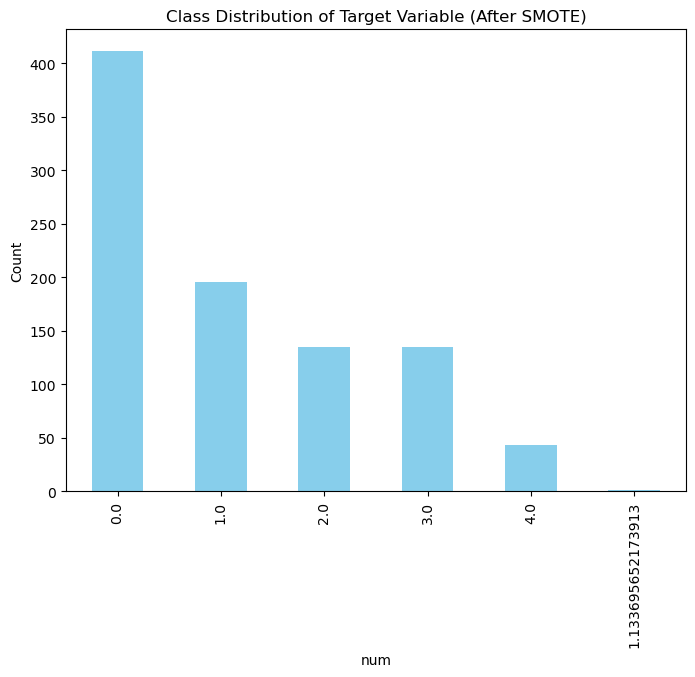

In [115]:
import matplotlib.pyplot as plt

# Assuming 'num' is your target variable in result_smote
target_variable = 'num'

# Display the class distribution of the target variable after SMOTE
plt.figure(figsize=(8, 6))
result_imputed[target_variable].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Target Variable (After SMOTE)')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()


En el grafico anterior se puede ver reflejada cuantos pacientes, es decir el numero de pacientes de 0 a 4, donde 0 es que no tienen ninguna enfermedad, tal cual como nos dice en el texto: presencia de enfermedad cardíaca en el paciente. Tiene un valor entero de 0 (sin presencia) a 4.

In [102]:
import pandas as pd
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# Assuming 'num' is your target variable in result_imputed
target_variable = 'num'

# Replace non-numeric values with NaN (if not done already)
result_imputed.replace('?', np.nan, inplace=True)
result_imputed = result_imputed.apply(pd.to_numeric, errors='coerce')

# Extract features and target variable
X = result_imputed.drop(target_variable, axis=1)
y = result_imputed[target_variable]

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Convert 'num' to categorical and filter values
y = y.astype('category')
y = y[y.isin([1, 2, 3, 4])]

# Check for consistent indices in X and y
common_indices = X_imputed.index.intersection(y.index)

# Apply SMOTE to balance the classes for the target variable 'num'
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed.loc[common_indices], y.loc[common_indices])

# Combine features and target variable into a new DataFrame
result_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_variable)], axis=1)

# Display the filtered and resampled DataFrame
print(result_smote)


           age       sex        cp    trestbps        chol       fbs  \
0    67.000000  1.000000  4.000000  160.000000  286.000000  0.000000   
1    67.000000  1.000000  4.000000  120.000000  229.000000  0.000000   
2    62.000000  0.000000  4.000000  140.000000  268.000000  0.000000   
3    63.000000  1.000000  4.000000  130.000000  254.000000  0.000000   
4    53.000000  1.000000  4.000000  140.000000  203.000000  1.000000   
..         ...       ...       ...         ...         ...       ...   
779  54.138214  0.046071  3.046071  130.239571  293.216786  0.046071   
780  55.510814  1.000000  4.000000  162.554068  288.829729  0.085136   
781  48.259683  0.629841  4.000000  125.038730  209.408889  0.000000   
782  59.938174  1.000000  3.984543  130.030913  206.030913  0.015457   
783  50.716814  1.000000  4.000000  139.283186  229.207964  0.000000   

      restecg     thalach     exang   oldpeak     slope        ca      thal  \
0    2.000000  108.000000  1.000000  1.500000  2.000000 

In [103]:
result_smote

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.000000,1.000000,4.000000,160.000000,286.000000,0.000000,2.000000,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,2.0
1,67.000000,1.000000,4.000000,120.000000,229.000000,0.000000,2.000000,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1.0
2,62.000000,0.000000,4.000000,140.000000,268.000000,0.000000,2.000000,160.000000,0.000000,3.600000,3.000000,2.000000,3.000000,3.0
3,63.000000,1.000000,4.000000,130.000000,254.000000,0.000000,2.000000,147.000000,0.000000,1.400000,2.000000,1.000000,7.000000,2.0
4,53.000000,1.000000,4.000000,140.000000,203.000000,1.000000,2.000000,155.000000,1.000000,3.100000,3.000000,0.000000,7.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,54.138214,0.046071,3.046071,130.239571,293.216786,0.046071,1.000000,100.875357,0.990786,0.044229,1.990786,-8.815714,-8.576143,4.0
780,55.510814,1.000000,4.000000,162.554068,288.829729,0.085136,2.000000,145.425678,1.000000,0.902163,2.085136,0.965946,7.000000,4.0
781,48.259683,0.629841,4.000000,125.038730,209.408889,0.000000,0.000000,96.740317,1.000000,0.740317,-4.928254,-9.000000,-3.447619,4.0
782,59.938174,1.000000,3.984543,130.030913,206.030913,0.015457,1.984543,131.795973,0.996909,2.372178,1.962904,1.953630,6.938174,4.0


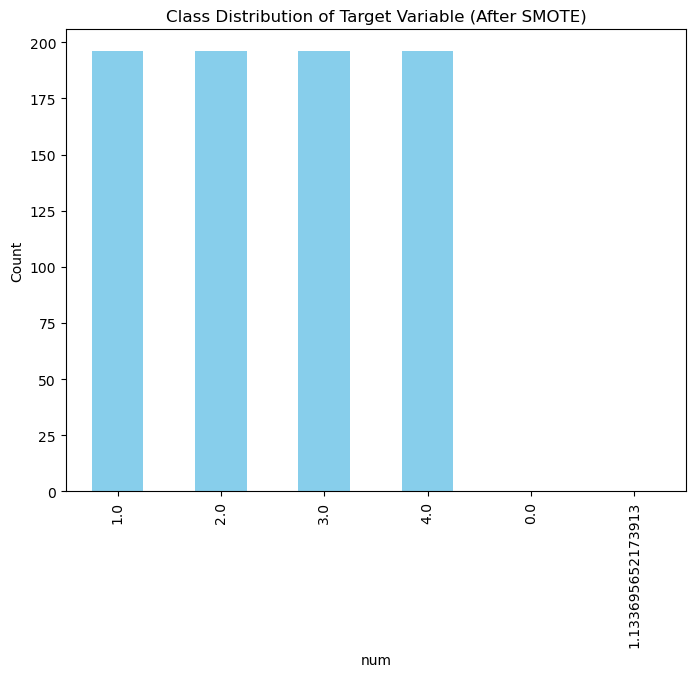

In [109]:
import matplotlib.pyplot as plt

# Assuming 'num' is your target variable in result_smote
target_variable = 'num'

# Display the class distribution of the target variable after SMOTE
plt.figure(figsize=(8, 6))
result_smote[target_variable].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Target Variable (After SMOTE)')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()


In [120]:
result_smote

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.000000,1.000000,4.000000,160.000000,286.000000,0.000000,2.000000,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,2.0
1,67.000000,1.000000,4.000000,120.000000,229.000000,0.000000,2.000000,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1.0
2,62.000000,0.000000,4.000000,140.000000,268.000000,0.000000,2.000000,160.000000,0.000000,3.600000,3.000000,2.000000,3.000000,3.0
3,63.000000,1.000000,4.000000,130.000000,254.000000,0.000000,2.000000,147.000000,0.000000,1.400000,2.000000,1.000000,7.000000,2.0
4,53.000000,1.000000,4.000000,140.000000,203.000000,1.000000,2.000000,155.000000,1.000000,3.100000,3.000000,0.000000,7.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,54.138214,0.046071,3.046071,130.239571,293.216786,0.046071,1.000000,100.875357,0.990786,0.044229,1.990786,-8.815714,-8.576143,4.0
780,55.510814,1.000000,4.000000,162.554068,288.829729,0.085136,2.000000,145.425678,1.000000,0.902163,2.085136,0.965946,7.000000,4.0
781,48.259683,0.629841,4.000000,125.038730,209.408889,0.000000,0.000000,96.740317,1.000000,0.740317,-4.928254,-9.000000,-3.447619,4.0
782,59.938174,1.000000,3.984543,130.030913,206.030913,0.015457,1.984543,131.795973,0.996909,2.372178,1.962904,1.953630,6.938174,4.0


Una vez realizada el Smote solamente de los paciente de 1-4, es decir los pacientes de 0 no se toman en cuenta para esta muestra

Responda la siguientes pregunta de control ¿Cree que el nuevo dataset creado es un data set confiable para aplicar una mineria de datos y explique el porqué?

A mi parecer si sería confiable porque partimos de 4 dataset confiables, seguidamente hicimos un relleno de datos y un balanceo solamente en la presencia de enfermedad cardíaca. Asi que la database en si se puede seguir utilizando para buscar el numero de personas que tienen otro tipo de enfermedades. o seguir con el mismo trabajo de encontrar los pacientes con el diagnostico de "diagnosis of heart disease", entonces para mi, si es aún confiable

In [122]:
result_smote.to_csv('tenesantiago.csv')